In [4]:
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()

In [5]:
df_X=diabetes.data
df_y=diabetes.target

In [31]:
import numpy as np
X = np.array(df_X)
y = np.array(df_y)

In [32]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [47]:
import numpy as np
W = np.random.rand(10)
b = np.random.rand(1)

In [48]:
W

array([0.03617897, 0.55035616, 0.05611462, 0.20807308, 0.84510754,
       0.70247051, 0.97419018, 0.63376732, 0.33234829, 0.78719126])

In [49]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [50]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [51]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [52]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [67]:
LEARNING_RATE = 0.1

In [68]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 3009.5248
Iteration 20 : Loss 3008.5556
Iteration 30 : Loss 3007.5957
Iteration 40 : Loss 3006.6448
Iteration 50 : Loss 3005.7028
Iteration 60 : Loss 3004.7698
Iteration 70 : Loss 3003.8456
Iteration 80 : Loss 3002.9300
Iteration 90 : Loss 3002.0231
Iteration 100 : Loss 3001.1247
Iteration 110 : Loss 3000.2347
Iteration 120 : Loss 2999.3531
Iteration 130 : Loss 2998.4797
Iteration 140 : Loss 2997.6146
Iteration 150 : Loss 2996.7575
Iteration 160 : Loss 2995.9084
Iteration 170 : Loss 2995.0673
Iteration 180 : Loss 2994.2340
Iteration 190 : Loss 2993.4085
Iteration 200 : Loss 2992.5907
Iteration 210 : Loss 2991.7806
Iteration 220 : Loss 2990.9779
Iteration 230 : Loss 2990.1827
Iteration 240 : Loss 2989.3949
Iteration 250 : Loss 2988.6145
Iteration 260 : Loss 2987.8412
Iteration 270 : Loss 2987.0752
Iteration 280 : Loss 2986.3162
Iteration 290 : Loss 2985.5643
Iteration 300 : Loss 2984.8193
Iteration 310 : Loss 2984.0812
Iteration 320 : Loss 2983.3499
Iteration 330 : L

In [69]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2865.029834788191

In [70]:
import matplotlib.pyplot as plt

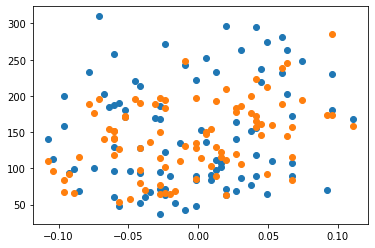

In [71]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()